<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20021_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Derivation of the Linear Operator $H$

### 1. Physical Boundary Conditions
The system is governed by specific constraints applied to a beam of length $L$. These boundary conditions are defined as follows:

* **At $x = 0$ (Pinned End):**
    * $y(0, t) = 0$ (The displacement is fixed at zero)
    * $\frac{\partial^2 y}{\partial x^2}(0, t) = 0$ (The internal bending moment vanishes)
* **At $x = L$ (Free End):**
    * $\frac{\partial^2 y}{\partial x^2}(L, t) = 0$ (The bending moment is zero at the tip)
    * $\frac{\partial^3 y}{\partial x^3}(L, t) = 0$ (The transverse shear force vanishes)



---

### 2. Definition of the Vector Space $F$
We define $F$ as an infinite-dimensional functional space containing all functions that are at least four-times continuously differentiable on $[0, L]$. To ensure the operator is compatible with our physical system, all functions in $F$ must satisfy the prescribed boundary conditions:

$$F = \{f \in C^4[0, L] \mid f(0) = 0, f''(0) = 0, f''(L) = 0, f'''(L) = 0\}$$

---

### 3. The Linear Operator $H$
The dynamic response of the beam is represented by the following partial differential equation:

$$\frac{\partial^2 y}{\partial t^2} + Hy = \frac{q(t, x)}{\rho A}$$

The linear operator $H: F \to F$ is expressed as:

$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4} + \frac{P_0}{\rho A} \frac{\partial^2}{\partial x^2}$$

---

### 4. Simplification for $P_0 = 0$
When axial compression ($P_0$) is absent, the second-order term is removed. The operator $H$ reduces to the following form:

$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}$$

Substituting this into the motion equations provides the standard **Euler-Bernoulli equation** for transverse vibration:

$$\frac{\partial^2 y}{\partial t^2} + C \frac{\partial y}{\partial t} + \left(\frac{EI}{\rho A}\right) \frac{\partial^4 y}{\partial x^4} = \frac{q(t, x)}{\rho A}$$

---

### 5. Separation of Variables and the Eigenvalue Problem
To find the free vibration solution, we assume the variables are separable: $y(x, t) = \phi(x)u(t)$. In the absence of external forcing ($q=0$) and damping ($C=0$), we get:

$$\frac{1}{u(t)} \frac{d^2 u}{dt^2} = -\frac{EI}{\rho A} \frac{1}{\phi(x)} \frac{d^4 \phi}{dx^4} = -\lambda$$

This defines the spatial eigenvalue problem for $H$:

$$H\phi(x) = \lambda\phi(x) \longrightarrow \frac{EI}{\rho A} \frac{d^4 \phi}{dx^4} = \omega^2 \phi(x)$$

where $\lambda = \omega^2$ denotes the squared natural frequencies.

---

### 6. General Spatial Solution
For the fourth-order ODE $\frac{d^4 \phi}{dx^4} - \beta^4 \phi = 0$ (where $\beta^4 = \frac{\omega^2 \rho A}{EI}$), the general solution is:

$$\phi(x) = A \sin(\beta x) + B \cos(\beta x) + C \sinh(\beta x) + D \cosh(\beta x)$$

**Applying the Pinned-Free boundary conditions:**
1. $\phi(0) = 0 \implies D = -B$
2. $\phi''(0) = 0 \implies B = D = 0$
3. $\phi''(L) = 0: -A \sin(\beta L) + C \sinh(\beta L) = 0$
4. $\phi'''(L) = 0: -A \cos(\beta L) + C \cosh(\beta L) = 0$

---

### 7. Characteristic Equation and Eigenfunctions
For non-trivial results, the system's determinant must be zero, yielding the characteristic equation:

$$\tan(\beta L) = \tanh(\beta L)$$

Solving for $\beta_n$ gives the natural frequencies and the associated mode shapes $\phi_n(x)$:

$$\phi_n(x) = \sin(\beta_n x) + \frac{\sin(\beta_n L)}{\sinh(\beta_n L)} \sinh(\beta_n x)$$



---

### 8. The General Solution
By leveraging the orthogonality of the eigenfunctions, the total transverse displacement $y(x, t)$ is expressed as the sum of all modal parts:

$$y(x, t) = \sum_{n=1}^{\infty} \phi_n(x)u_n(t)$$

Where $u_n(t)$ satisfies the temporal equation:

$$\ddot{u}_n(t) + \frac{C}{\rho A} \dot{u}_n(t) + \omega_n^2 u_n(t) = f_n(t)$$

This maps the continuous system onto the structure of a discrete multi-degree-of-freedom system.

<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-66632532.py:32: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Mode Shapes $\phi_n(x)$ for Pinned-Free Beam', fontsize=14)


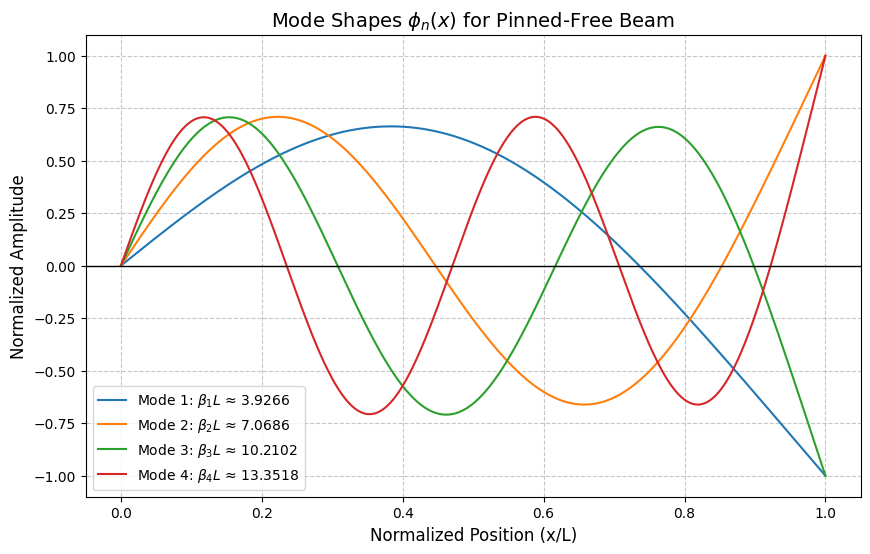

Calculated Roots (beta_n * L):
n=1: 3.926602
n=2: 7.068583
n=3: 10.210176
n=4: 13.351769


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# 1. Define the transcendental characteristic equation: tan(beta*L) - tanh(beta*L) = 0
def characteristic_equation(betaL):
    return np.tan(betaL) - np.tanh(betaL)

# 2. Find the first 4 roots (beta_n * L)
# We use initial guesses based on the asymptotic behavior of the functions
initial_guesses = [3.9, 7.0, 10.2, 13.3]
roots = fsolve(characteristic_equation, initial_guesses)

# 3. Define the Eigenfunction (Mode Shape) phi_n(x)
def mode_shape(x, L, betaL):
    term2 = (np.sin(betaL) / np.sinh(betaL)) * np.sinh(betaL * x / L)
    return np.sin(betaL * x / L) + term2

# 4. Set up the plot
L = 1.0  # Normalized length
x_vals = np.linspace(0, L, 500)
plt.figure(figsize=(10, 6))

for i, root in enumerate(roots):
    phi_n = mode_shape(x_vals, L, root)
    # Normalize for plotting
    phi_n = phi_n / np.max(np.abs(phi_n))
    plt.plot(x_vals, phi_n, label=f'Mode {i+1}: $\\beta_{i+1}L$ ≈ {root:.4f}')

# 5. Formatting the graph
plt.axhline(0, color='black', linewidth=1)
plt.title('Mode Shapes $\phi_n(x)$ for Pinned-Free Beam', fontsize=14)
plt.xlabel('Normalized Position (x/L)', fontsize=12)
plt.ylabel('Normalized Amplitude', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print the calculated roots for reference
print("Calculated Roots (beta_n * L):")
for i, r in enumerate(roots):
    print(f"n={i+1}: {r:.6f}")